In [1]:
## Change to code if plots do not show up.
%matplotlib inline

# Spatial and Timeseries visualisation of AWRA-L inputs and outputs

The inputs to and results of an AWRA-L simulation can be viewed both spatially and temporally using the tools of the AWRA MS. 



This notebook will demonstrate the available functionality to visualise outputs or inputs that are in the format used by the model, <br>
i.e. in CF compliant netcdf files that contain a year's worth of daily data for a single variable.
<BR>

In addition, it will be shown how other tools can be used for extracting subsets of data from the overall outputs.

The following steps are covered:
    
    1. Import required libraries
    2. Load inputs or results
        2.1 Inspect which variables are available
    3. Spatial plots for different data slices
        3.1 A single day, whole extents
        3.2 Aggregated over a month for specified region
        3.3 Change aggregation method
        3.4 Accessing the underlying data
        3.5 Specifying a catchment extent
        3.6 Show location of catchment
        3.7 Manipulating matplotlib settings
    4. Timeseries plots for selected locations/regions
        4.1 Time series for a single location
        4.2 Time series for a catchment
    5. Exercise

### 1. Import required modules

In [2]:
import awrams.visualisation.vis as vis
import awrams.visualisation.results as res

import awrams.utils.extents as extents

from awrams.utils.gis import ShapefileDB, CATCHMENT_SHAPEFILE

from awrams.models.settings import TRAINING_DATA_PATH

### 2.  Load inputs or results

expects to find netcdf files in folder

In [3]:
#results = res.load_results('../test_data/visualisation')
results = res.load_results('../Simulation/_results_ServerSim')

inputs  = res.load_results(TRAINING_DATA_PATH+ '/climate/BOM_climate/rain_day/')

In [4]:
results.path

'/data/cwd_awra_data/AWRAMSI/IWRM_0042_WP3/GIT/Avi/new_cms/awrams_cm/Training/Simulation/_results_ServerSim'

In [5]:
inputs.path

'/data/cwd_awra_data/AWRACMS/Training/test_data/climate/BOM_climate/rain_day'

#### 2.1 Inspect variables present in results
tab completable access to variable list

In [6]:
results.variables

OrderedDict([('etot', etot), ('qtot', qtot), ('sd', sd), ('ss', ss)])

In [7]:
results.period

DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-04',
               '2010-12-05', '2010-12-06', '2010-12-07', '2010-12-08',
               '2010-12-09', '2010-12-10', '2010-12-11', '2010-12-12',
               '2010-12-13', '2010-12-14', '2010-12-15', '2010-12-16',
               '2010-12-17', '2010-12-18', '2010-12-19', '2010-12-20',
               '2010-12-21', '2010-12-22', '2010-12-23', '2010-12-24',
               '2010-12-25', '2010-12-26', '2010-12-27', '2010-12-28',
               '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01',
               '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-09',
               '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13',
               '2011-01-14', '2011-01-15', '2011-01-16', '2011-01-17',
               '2011-01-18', '2011-01-19', '2011-01-20', '2011-01-21',
               '2011-01-22', '2011-01-23', '2011-01-24', '2011-01-25',
      

In [8]:
results.variables.qtot

qtot

In [9]:
inputs.variables

OrderedDict([('rain_day', rain_day)])

### 3.  Spatial plots for different data slices

##### Approach: define slice of interest for viewing = [variables, period, extent]<br>
variables slice
* display a single variable - results.variables.qtot
* display multiple variables with a tuple - results.variables.qtot,results.variables.ss
* display all variables using standard slicing syntax - ":"

period slice
* a single day - "1 jul 2010"
* a period - "jul 2010" or "jul 2010 - jun 2011"
* data will be aggregated over the period using the specified method (pass aggregate_method='average' or aggregate_method='sum')<br>or the default method for a variable

extent slice
* entire spatial extents - ":" or extents.get_default_extent()
* a bounding box - results.extent.icoords[-39.5:-44,143.5:149]
* a catchment - catchments.get_extent_by_field('GaugeName','Gunning',results.extent)

#### 3.1 A single day, whole extents

/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


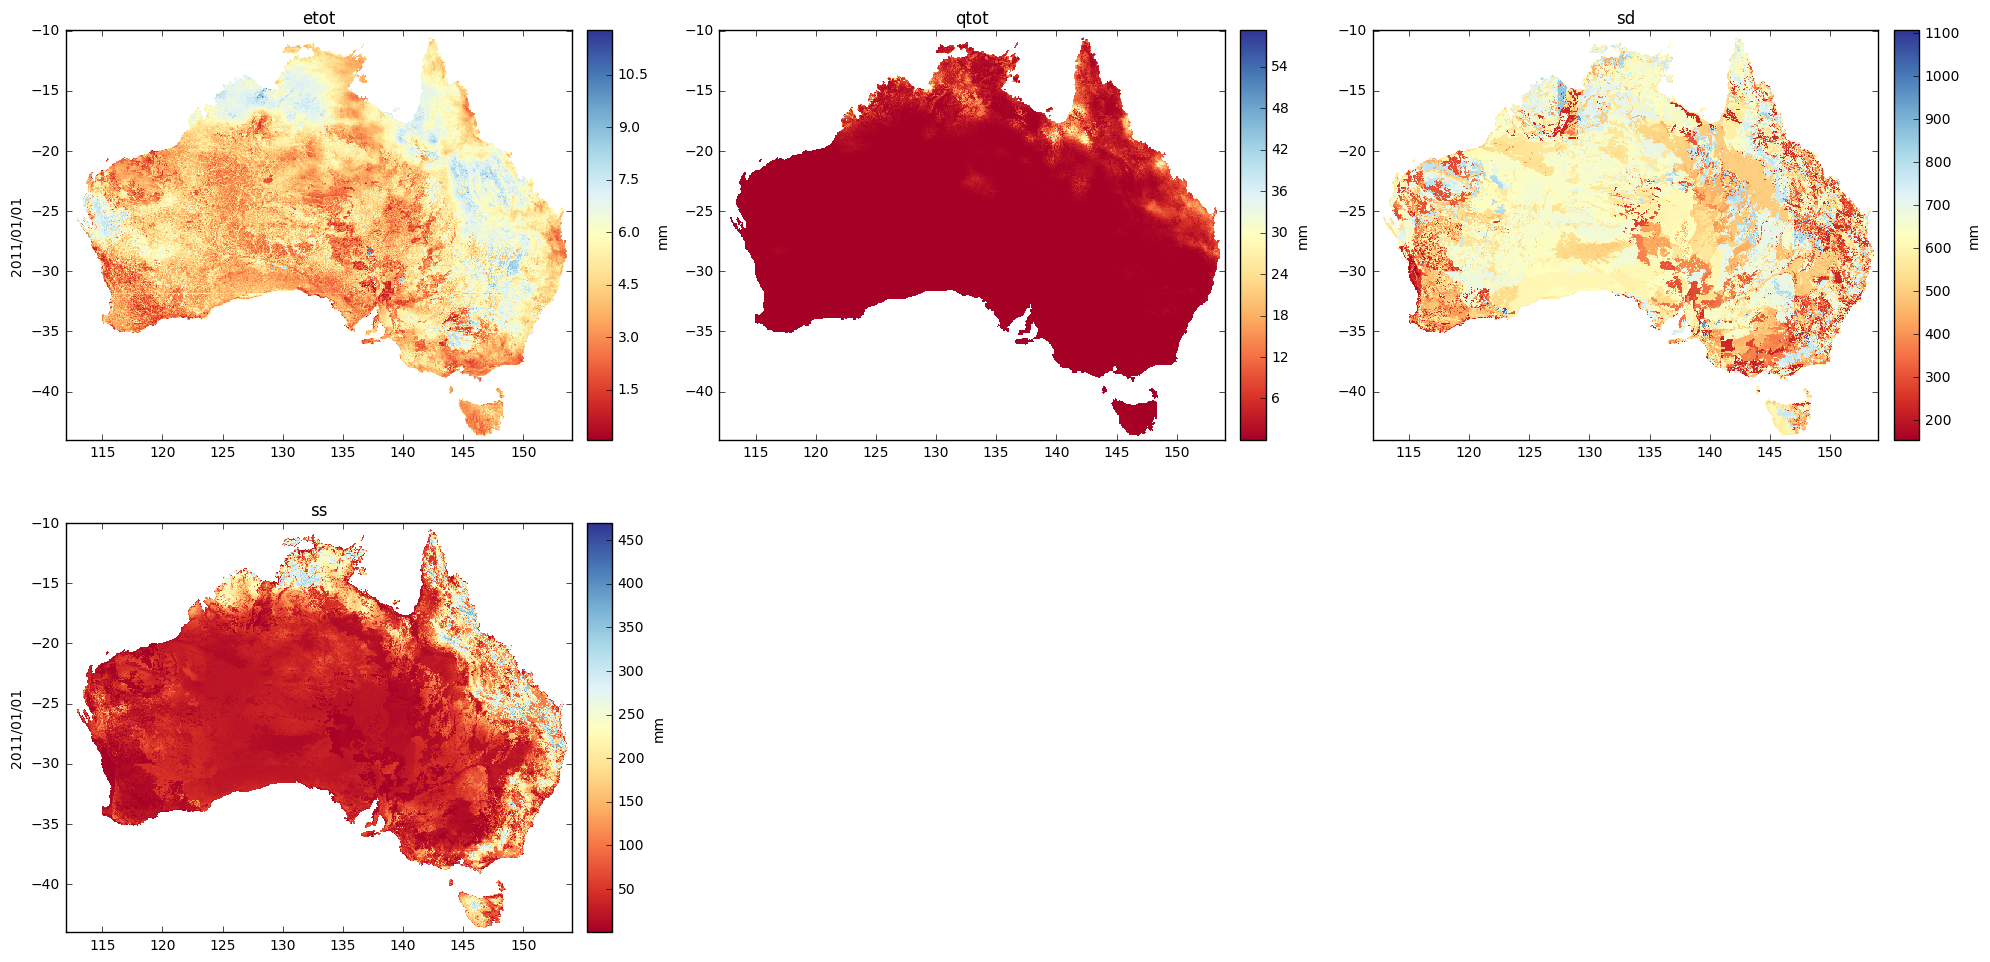

In [10]:
results[:,'1 jan 2011',:].spatial()

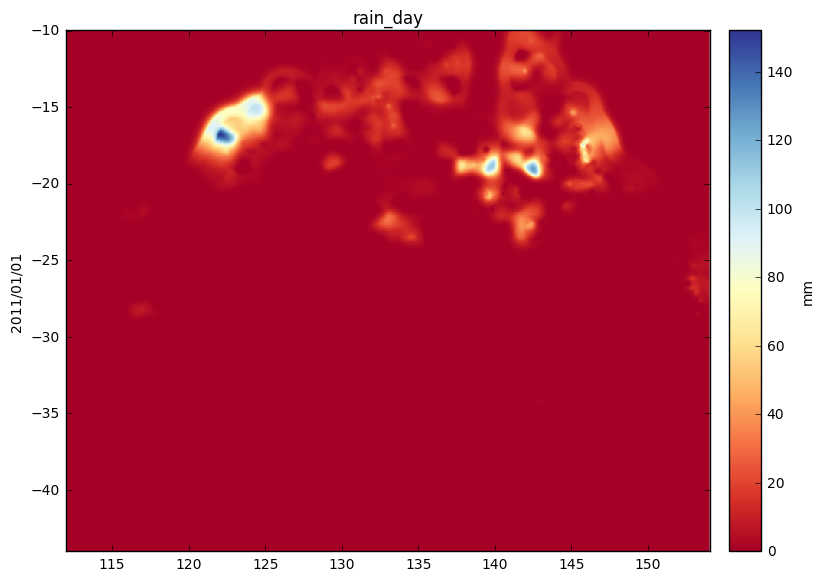

In [11]:
inputs[:,'1 jan 2011',:].spatial() # the entire grid is covered in data because the input file is not masked

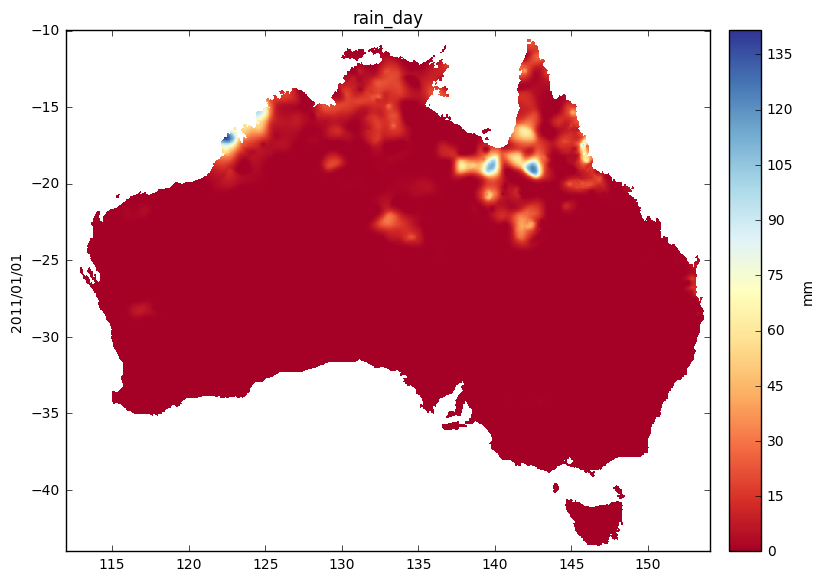

In [12]:
inputs[:,'1 jan 2011',extents.get_default_extent()].spatial()  #  one way to mask it is to specify the default extent

#### 3.2 Aggregated over a month for specified region
Also saves picture to png

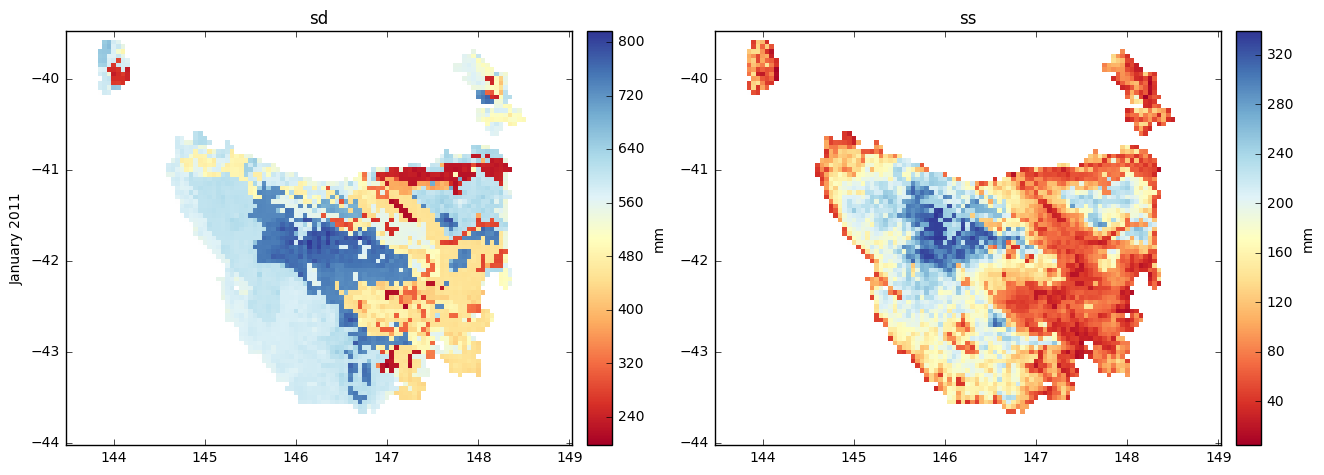

In [13]:
v = results.variables.sd,results.variables.ss

results[v,'jan 2011',results.extent.icoords[-39.5:-44,143.5:149]].spatial()

vis.plt.savefig('map_of_tasmania.png', format='png', dpi=120)

#### 3.3. Change aggregation method 

Here, from default of mean to sum

In [14]:
v

(sd, ss)

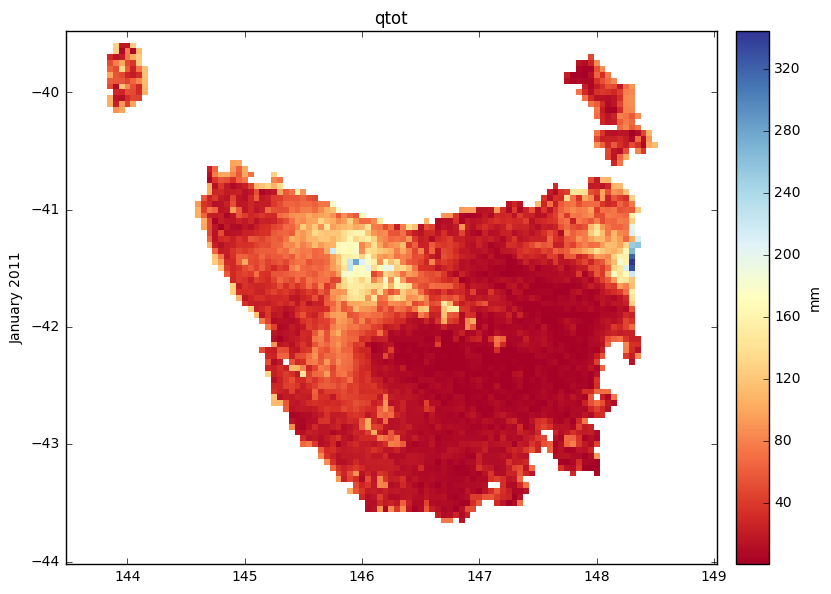

In [15]:
v = results.variables.qtot
v.agg_method = 'sum'
results[v,'jan 2011',results.extent.icoords[-39.5:-44,143.5:149]].spatial()

#### 3.4 Accessing the underlying data
raw data cube

In [16]:
ss_data = results.variables.ss.data

Data shape

In [17]:
results.variables.ss.data.shape

(31, 91, 111)

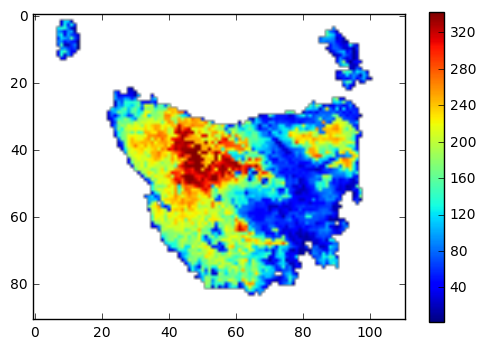

In [18]:
import matplotlib.pyplot as plt
plt.imshow(ss_data[30])
plt.colorbar()

temporally aggregated data

In [19]:
results.variables.ss.agg_data.shape

(91, 111)

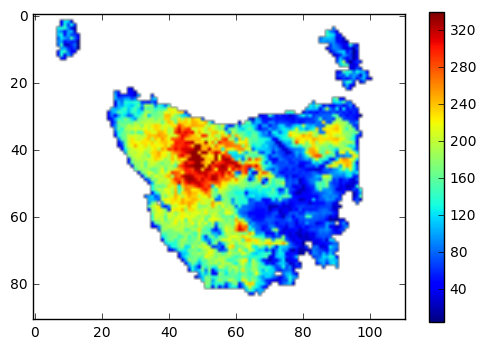

In [20]:
ss_agg_data = results.variables.ss.agg_data
plt.imshow(ss_agg_data)
plt.colorbar()

#### 3.5 Specifying a catchment extent

In [21]:
## By default catchments used in AWRA calibration/validation are read from a supplied shapefile

from awrams.utils.gis import CATCHMENT_SHAPEFILE
CATCHMENT_SHAPEFILE

'/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/utils/data/Final_list_all_attributes.shp'

Features in the shapefile are referenced by *key_field: 'StationID'*<br>
and features named with *name_fields: ['GaugeName', 'RiverName']*<br>
<br>
to supply a different shapefile call:

    catchments = CatchmentDB(shp_file="shape_file_name")
        
to specify different feature field names for key_field and name_fields, before calling CatchmentDB set:

    CatchmentDB.key_field = "new_id_field"
    CatchmentDB.name_fields = ["new_name_field_1","new_name_field_2,...]
    CatchmentDB.name_format = "%s (%s)" ### number of format specifiers = number of name_fields

In [23]:
## A quick way to inspect the contents of the shapefile 
default_catchments = ShapefileDB(CATCHMENT_SHAPEFILE)
default_catchments_df = default_catchments.get_records_df()
default_catchments_df.head()

AI   AlbersArea  Cal_Val   CentrLat    CentrLon   DateOpen  \
0  3.035136  5792.427800        0 -24.659546  146.188956  1/01/1969   
1  5.982206   320.401464       -1 -30.021958  139.517736  1/01/1972   
2  5.581191  1013.515346        1 -30.692950  139.006100  1/01/1973   
3  5.224682  3323.972600        1 -23.974046  133.340785  1/01/1972   
4  4.809843   434.946800       -1 -23.436722  134.315857  1/01/1967   

  DateQfinish  Downstr_1  Downstr_2  Downstr_3    ...          MeanP  \
0   10/4/2011          0          0          0    ...     556.338623   
1   1/10/1991          0          0          0    ...     241.771332   
2   13/3/1989          0          0          0    ...     265.750458   
3   7/12/2011          0          0          0    ...     314.112885   
4  31/12/2011          0          0          0    ...     352.356567   

   QComplete       RiverName  SlopeMean  SlopeRange  State  StationID  \
0  93.998816          Barcoo    1.01441     11.2756    QLD     003303   
1  29.554536     Hamilton Ck    3.66823     18.2268     SA     004502   
2  35.540921  Mt McKinlay Ck    4.07388     22.4773     SA     004508   
3  99.822406            Hugh    2.11346     28.3030     NT     005115   
4  82.618026     Trephina Ck    2.64208     24.1171     NT     006005   

   Whpk1_Mean Whpk2_Mean    WrscID  
0     32.0211    70.6515   003303A  
1     35.0000    77.0000  AW004502  
2     34.9490    76.5210  AW004508  
3     27.2579    81.0000  G0050115  
4     22.8571     0.0000  G0060005  

[5 rows x 35 columns]

In [24]:
gunning = default_catchments.get_extent_by_field('GaugeName','Gunning',results.extent)
gunning

origin: -34.55,149.25, shape: (10, 8), cell_size: 0.05

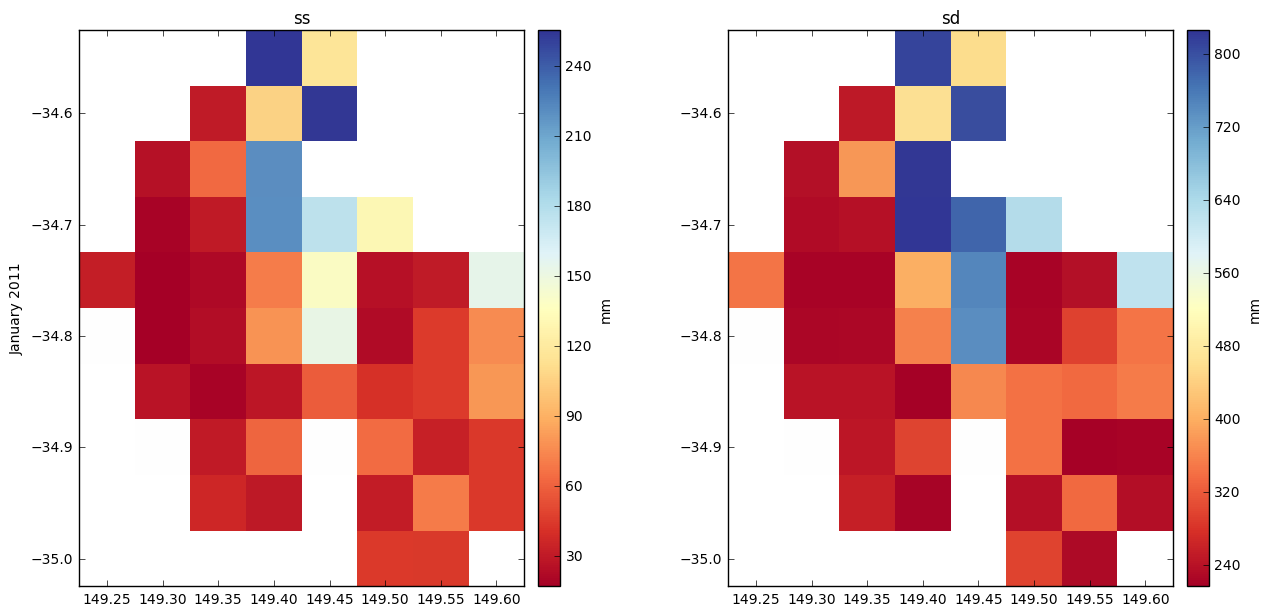

In [25]:
v = results.variables.ss,results.variables.sd
results[v,'jan 2011',gunning].spatial(interpolation=None) #interpolation="bilinear")

#### 3.6 Show location of catchment

/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/visualisation/vis.py:82: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  to_plot.data[c_ext.indices][c_ext.mask==False] = 2.0


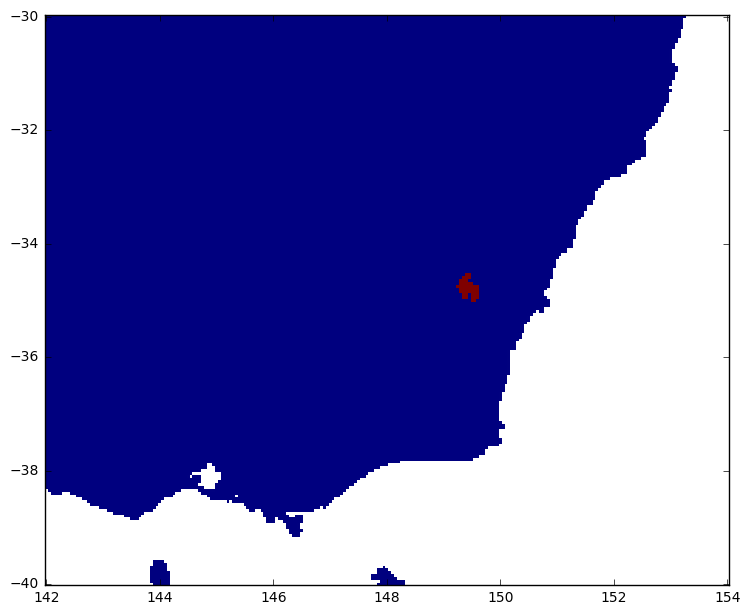

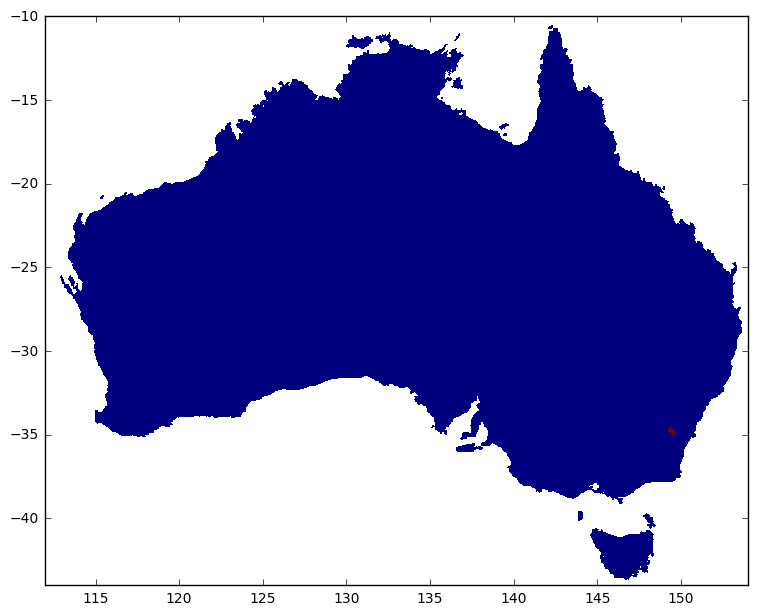

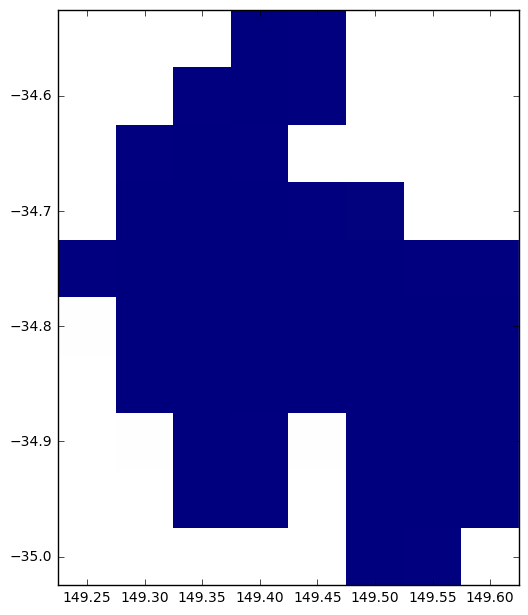

In [26]:
#vis.show_extent(gunning)
vis.show_extent(gunning,results.extent.icoords[-30:-40,142:154])
vis.show_extent(gunning,results.extent)
vis.show_extent(gunning,gunning)

#### 3.7 Manipulating matplotlib settings

##### Specifying plotting ranges and labelling

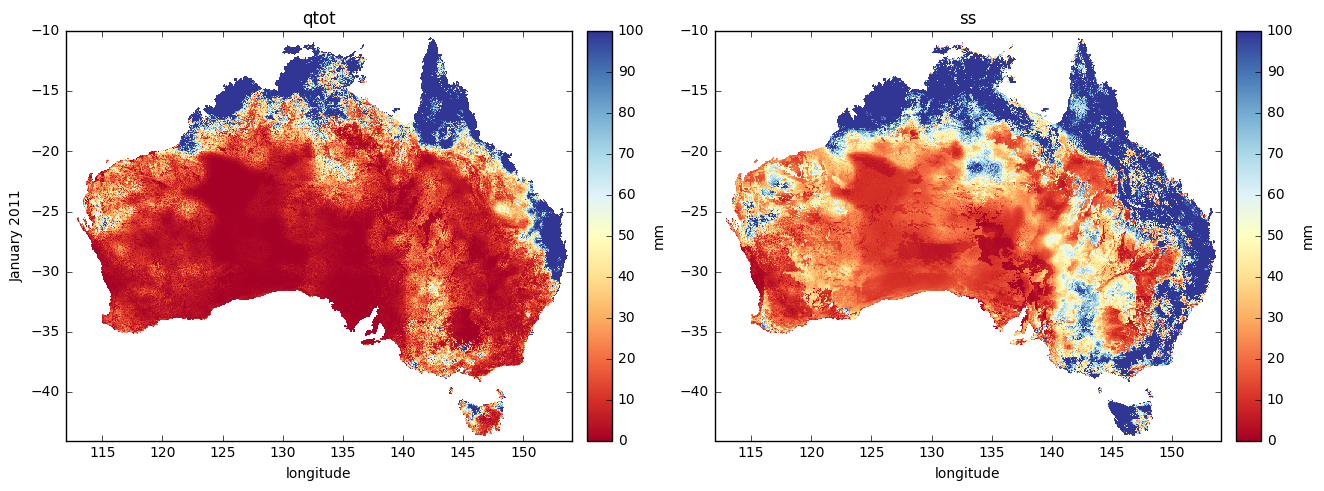

In [27]:
v = results.variables.qtot,results.variables.ss
results[v,'jan 2011',:].spatial(clim=(0,100),xlabel="longitude")

#### accessing the underlying axes
get the range of data for the selection

In [28]:
q = results[v,'jan 2011',results.extent.icoords[-30:-40,142:154]]
q.get_data_limits()

(0.0, 412.8)

set colour range limits and horizontal axis labels

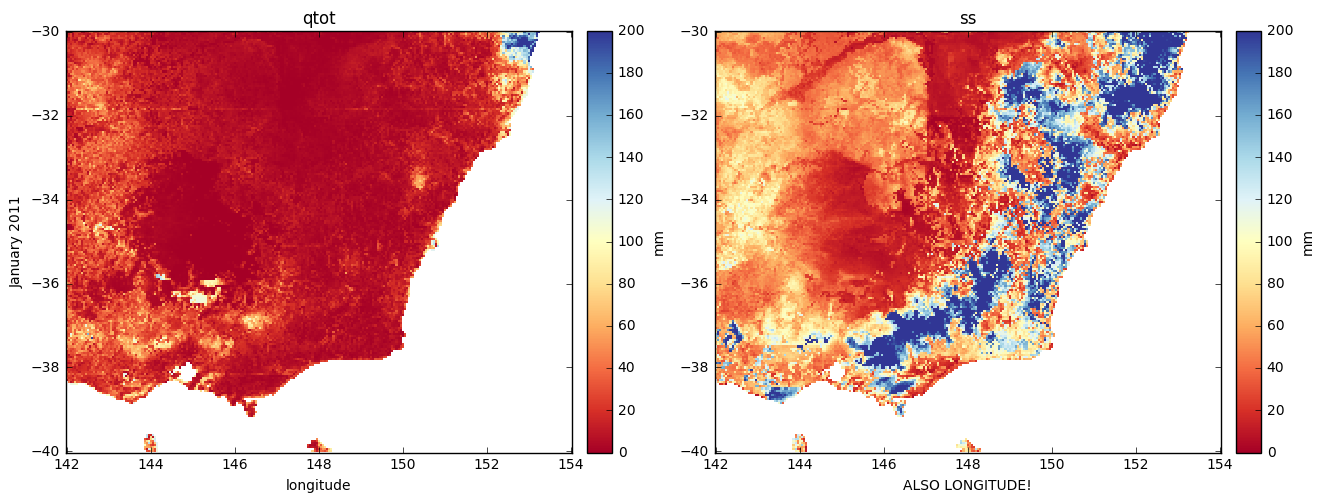

In [29]:
q.spatial(clim=(0,200),xlabel="longitude")

gridview = q.mpl
view = gridview.children[0,1]

view.ax.set_xlabel("ALSO LONGITUDE!")
vis.plt.show()

### 4. Timeseries plots for selected locations/regions

#### 4.1 Time series for a single location

/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/utils/ts/processing.py:669: FutureWarning: TimeSeries is deprecated. Please use Series
  out_data = pd.TimeSeries(index=period,name=variable.name)


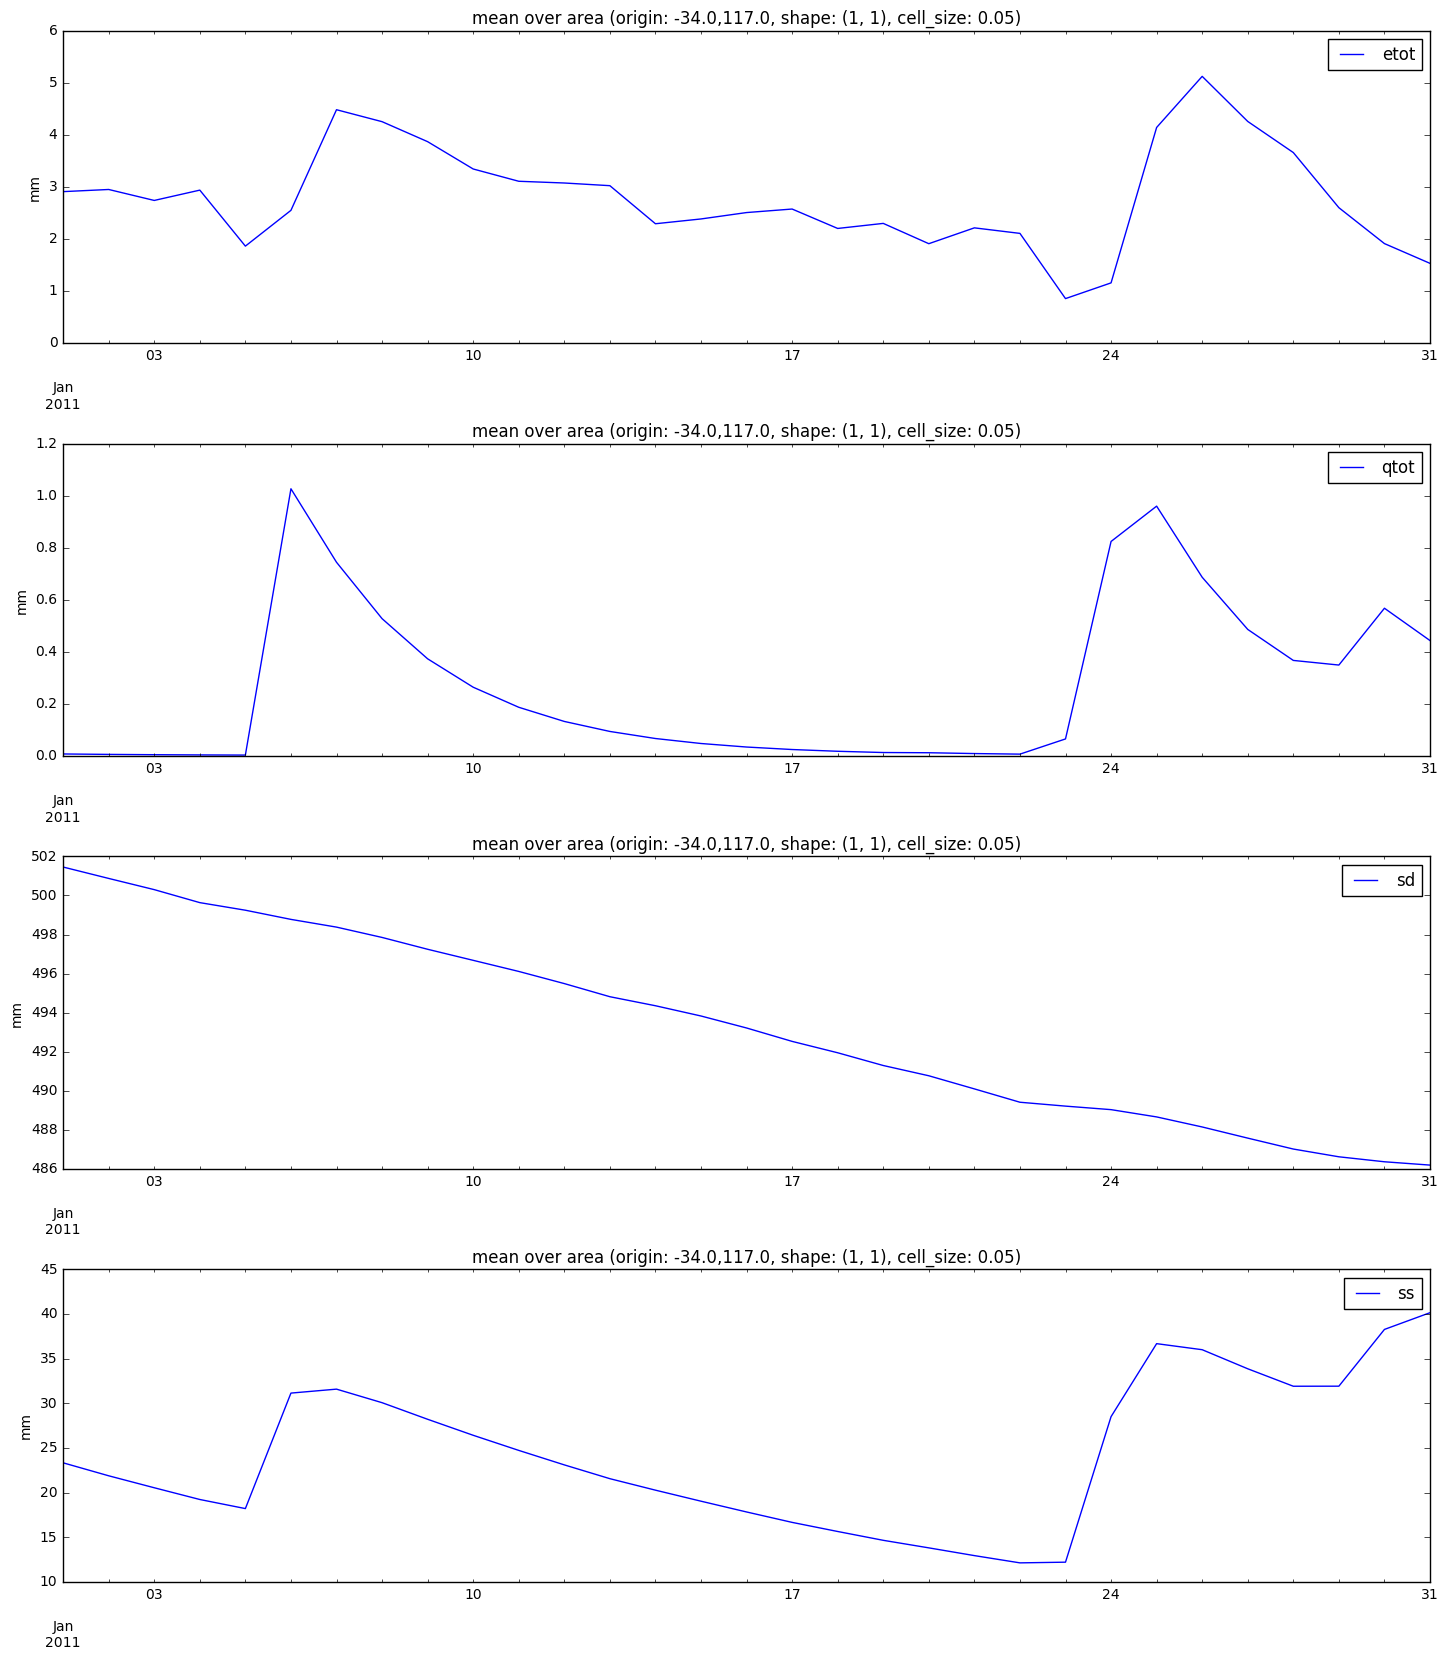

In [30]:
p = 'jan 2011'
e = results.extent.icoords[-34,117]
results[:,p,e].timeseries()

#### 4.2 Time series of aggregate over catchment

By default, the average over a catchment will be produced if you provide a catchment extent

In [31]:
edef = results.extent

/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/utils/ts/processing.py:669: FutureWarning: TimeSeries is deprecated. Please use Series
  out_data = pd.TimeSeries(index=period,name=variable.name)


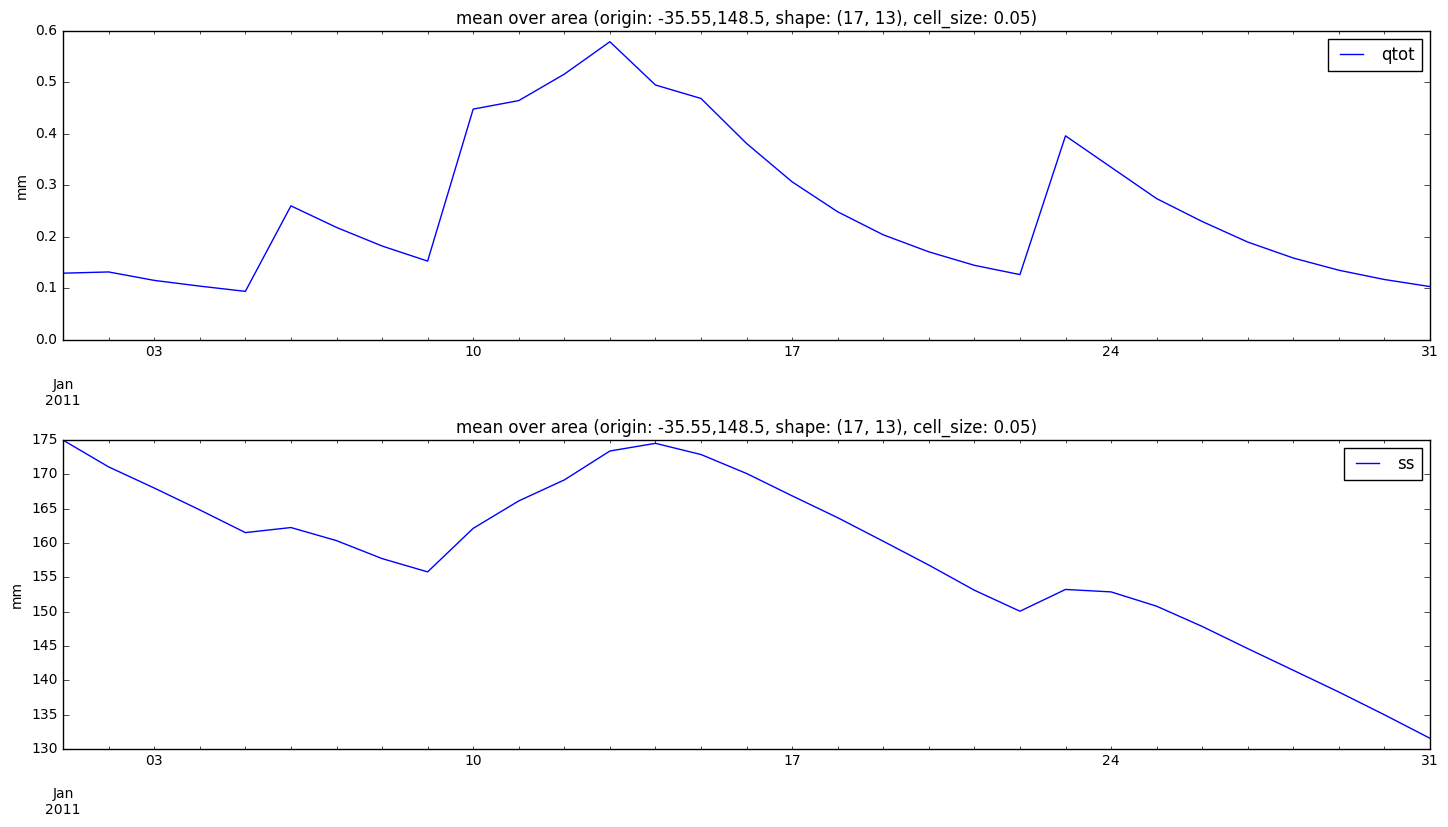

In [32]:
v = results.variables.qtot,results.variables.ss
p = 'jan 2011'
e = default_catchments.get_extent_by_field('GaugeName','Mittagang Crossing',results.extent)
results[v,p,e].timeseries()

In [33]:
results.variables.qtot.data.shape,results.variables.qtot.agg_data.shape

((31, 17, 13), (31,))

#### 4.3 More Matplotlib formatting options

/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/utils/ts/processing.py:669: FutureWarning: TimeSeries is deprecated. Please use Series
  out_data = pd.TimeSeries(index=period,name=variable.name)


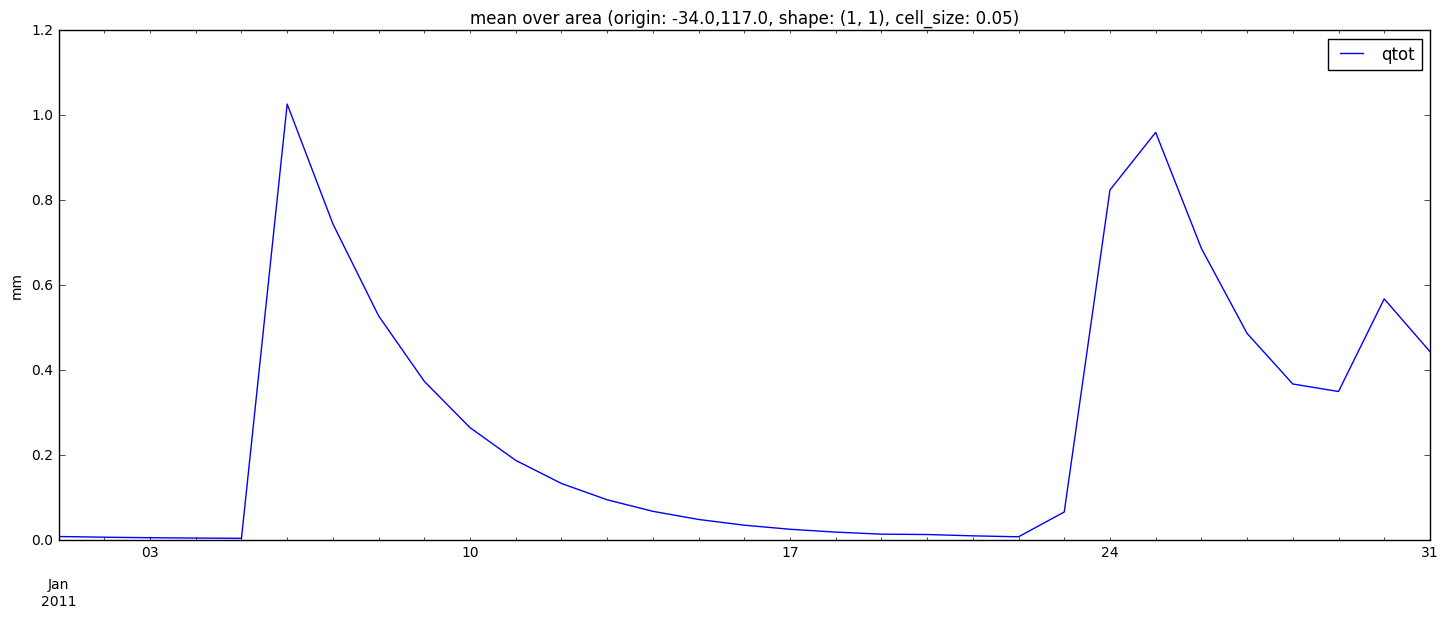

In [34]:
v = results.variables.qtot
e = results.extent.icoords[-34,117]
p = 'jan 2011'

q = results[v,p,e]
q.timeseries()

/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/awrams/utils/ts/processing.py:669: FutureWarning: TimeSeries is deprecated. Please use Series
  out_data = pd.TimeSeries(index=period,name=variable.name)


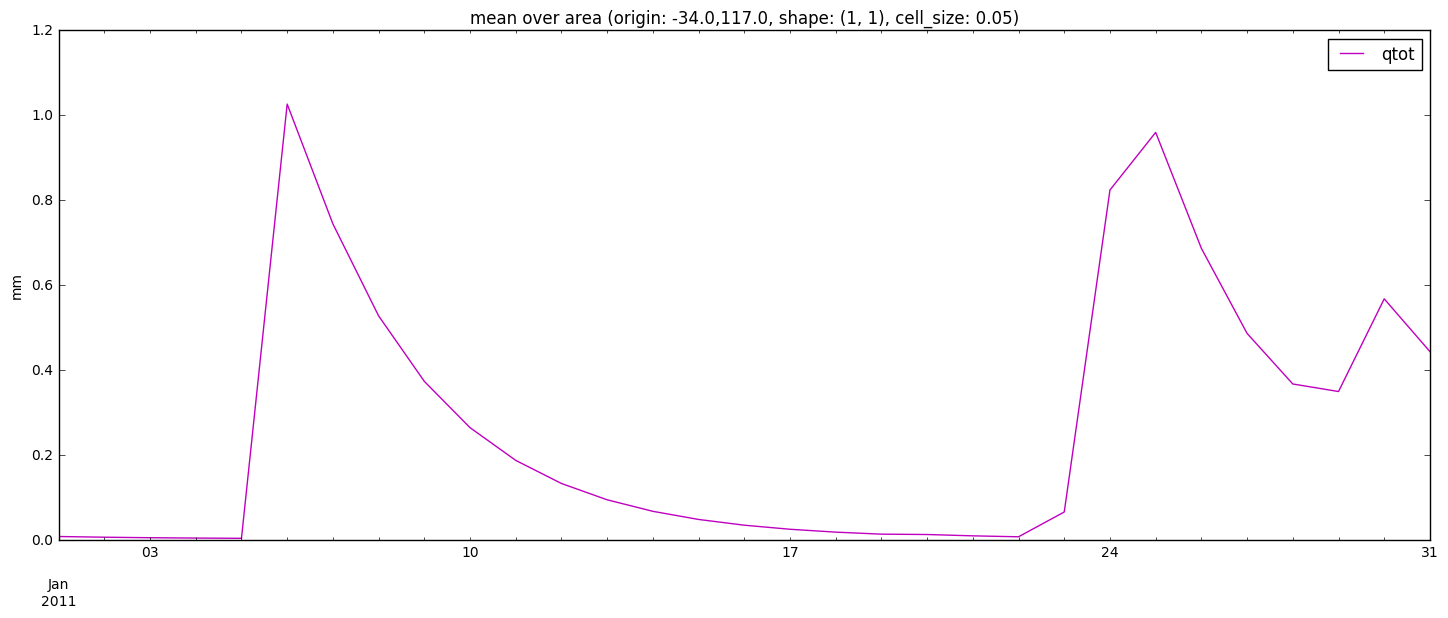

In [35]:
q.timeseries() #ylim=(0,20))  # q is an object that carries data as well as matplotlib configurations

ax = q.mpl.children[0,0].ax
lines = ax.get_lines()
line = lines[0]
line.set_color('m')
leg = ax.get_legend()
legline = leg.get_lines()[0]
legline.set_color('m')

### 5. Exercise: Visualising climatic inputs


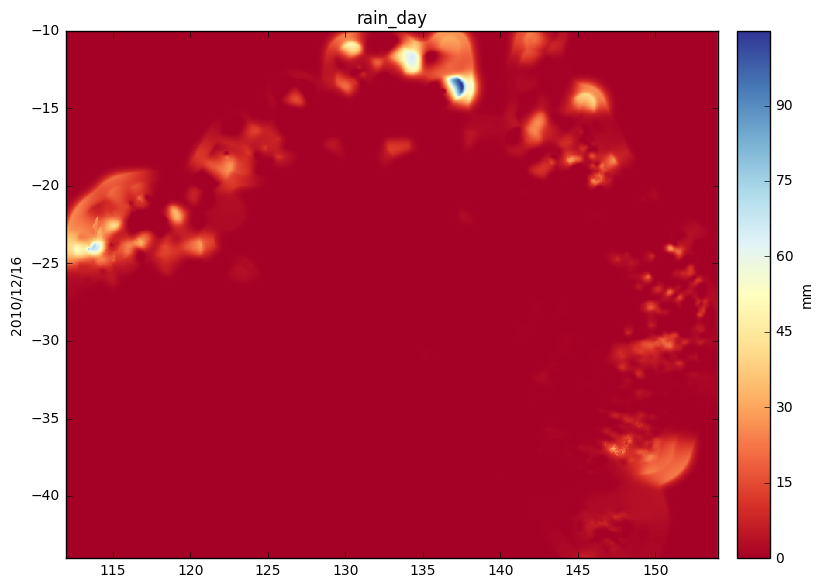

In [36]:
import numpy as np
precip = res.load_results(TRAINING_DATA_PATH +'climate/BOM_climate/rain_day')

vis.spatial(precip.variables.rain_day, period='16 dec 2010')

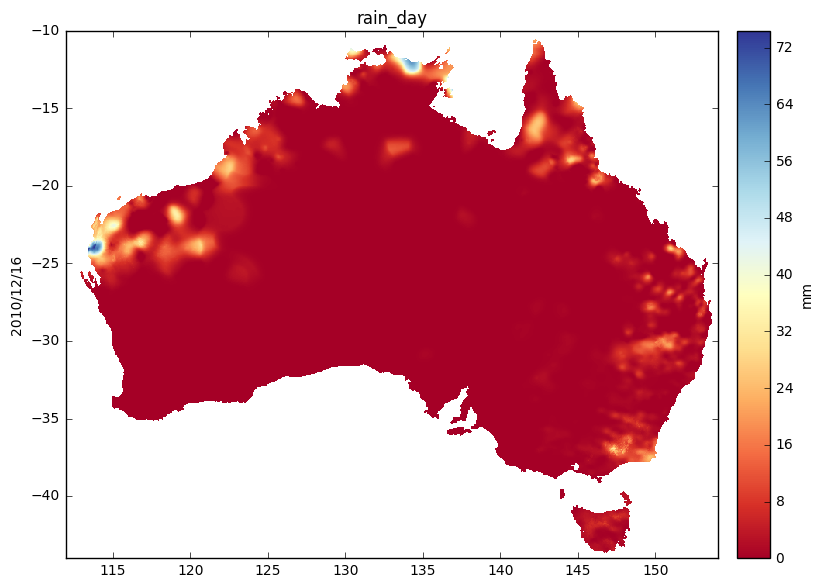

In [37]:
## If you want to see the data only over Australia, use the defaul extent definition

vis.spatial(precip.variables.rain_day, period='16 dec 2010', extent=extents.get_default_extent())

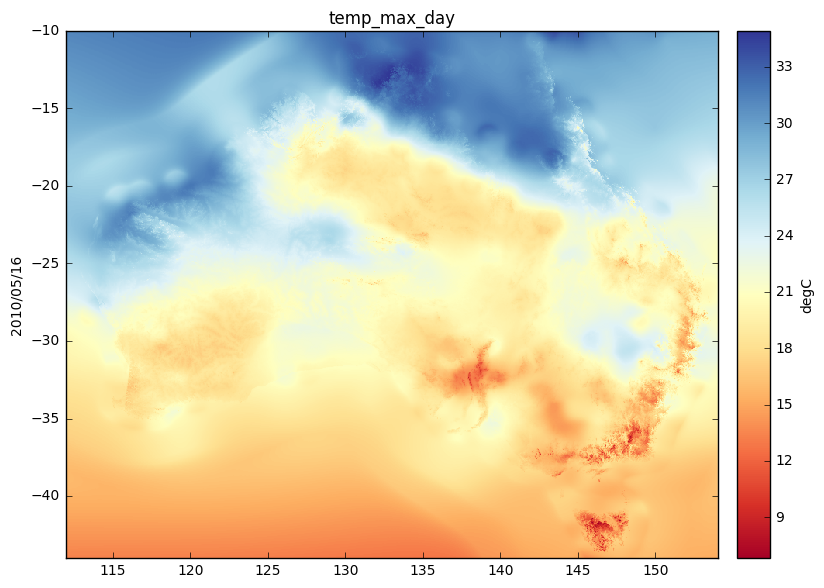

In [38]:
tmax = res.load_results(TRAINING_DATA_PATH+ 'climate/BOM_climate/temp_max_day/')

vis.spatial(tmax.variables.temp_max_day, period='16 may 2010')

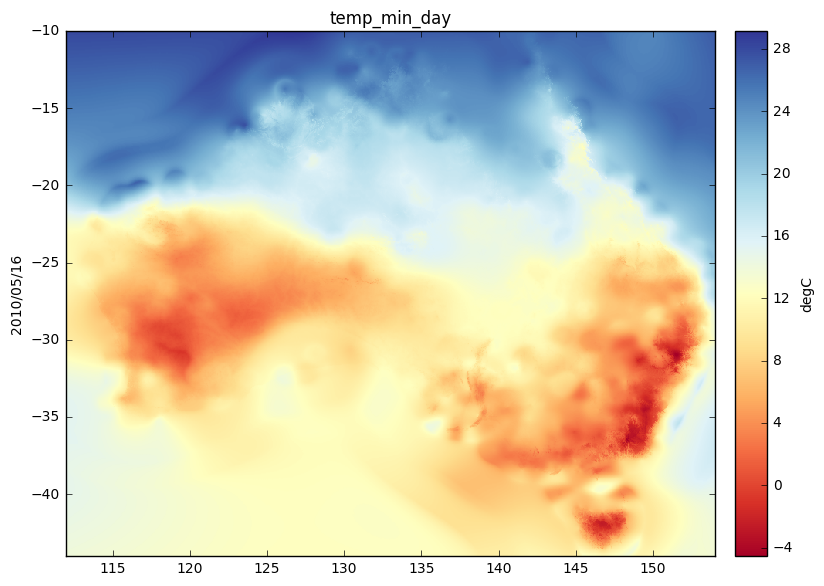

In [39]:
tmin = res.load_results(TRAINING_DATA_PATH  + '/climate/BOM_climate/temp_min_day/')
vis.spatial(tmin.variables.temp_min_day, period='16 may 2010')

/data/cwd_awra_data/AWRACMS/MINICONDA3/envs/awra-cms/lib/python3.4/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


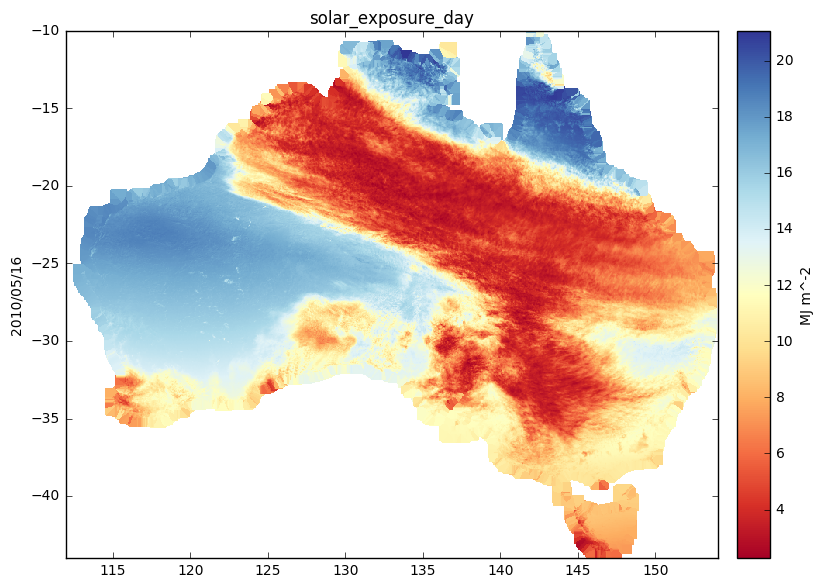

In [40]:
solar = res.load_results( TRAINING_DATA_PATH + 'climate/BOM_climate/solar_exposure_day/')
vis.spatial(solar.variables.solar_exposure_day, period='16 may 2010')